# Importar librerias y cargar documentos

In [121]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # ver todas las filas

In [122]:
# Cargar los datos
# -----------------------------------------------------------------------
df1 = pd.read_csv("Customer Flight Activity.csv")
df2 = pd.read_csv("Customer Loyalty History.csv")


# Exploración de datos

Descripción de las columnas

```
Customer Flight Analysis.csv
Este archivo contiene información sobre la actividad de vuelo de los clientes, incluyendo el número de
vuelos reservados, la distancia volada, puntos acumulados y redimidos, y costos asociados a los puntos
redimidos.

Loyalty Number: Este atributo representa un identificador único para cada cliente dentro del
programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.

Year: Indica el año en el cual se registraron las actividades de vuelo para el cliente.

Month: Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.

Flights Booked: Número total de vuelos reservados por el cliente en ese mes específico.

Flights with Companions: Número de vuelos reservados en los cuales el cliente viajó con
acompañantes.

Total Flights: El número total de vuelos que el cliente ha realizado, que puede incluir vuelos
reservados en meses anteriores.

Distance: La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado
durante el mes.

Points Accumulated: Puntos acumulados por el cliente en el programa de lealtad durante el mes,
con base en la distancia volada u otros factores.

Points Redeemed: Puntos que el cliente ha redimido en el mes, posiblemente para obtener
beneficios como vuelos gratis, mejoras, etc.

Dollar Cost Points Redeemed: El valor en dólares de los puntos que el cliente ha redimido durante
el mes.

Customer Loyalty History.csv
Este archivo proporciona un perfil detallado de los clientes, incluyendo su ubicación, nivel educativo,
ingresos, estado civil, y detalles sobre su membresía en el programa de lealtad (como el tipo de tarjeta,
valor de vida del cliente, y fechas de inscripción y cancelación).

Loyalty Number: Identificador único del cliente dentro del programa de lealtad. Este número permite
correlacionar la información de este archivo con el archivo de actividad de vuelos.

Country: País de residencia del cliente.

Province: Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales
o estatales, como Canadá).

City: Ciudad de residencia del cliente.

Postal Code: Código postal del cliente.

Gender: Género del cliente (ej. Male para masculino y Female para femenino).

Education: Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para
estudios universitarios o técnicos, etc.).

Salary: Ingreso anual estimado del cliente.

Marital Status: Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para
divorciado, etc.).

Loyalty Card: Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o
categorías dentro del programa de lealtad.

CLV (Customer Lifetime Value): Valor total estimado que el cliente aporta a la empresa durante
toda la relación que mantiene con ella.

Enrollment Type: Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).

Enrollment Year: Año en que el cliente se inscribió en el programa de lealtad.

Enrollment Month: Mes en que el cliente se inscribió en el programa de lealtad.

Cancellation Year: Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.

Cancellation Month: Mes en que el cliente canceló su membresía en el programa de lealtad, si
aplica.
```


In [123]:
# Funcion para realizar un EDA Básico
def eda_basico(df):
    # 🌷 Mostrar ejemplos de datos para tener una primera idea
    print('🌷 Ejemplo de datos del DF:')
    display(df.head(3))    # Primeras 3 filas
    display(df.tail(3))    # Últimas 3 filas
    display(df.sample(3))  # 3 filas aleatorias
    print('─' * 100)

    # 🌻 Número total de filas (observaciones)
    print('🌻 Número de filas:')
    print(df.shape[0])
    print('─' * 100)

    # 🌱 Número total de columnas (variables)
    print('🌱 Número de columnas:')
    print(df.shape[1])
    print('─' * 100)

    # 🌼 Información general del DataFrame (tipos, nulos, etc.)
    print('🌼 Información de la tabla:')
    display(df.info())
    print('─' * 100)

    # 🌑 Lista con los nombres de las columnas
    print('🌑 Nombre de las columnas:')
    print(df.columns.tolist())
    print('─' * 100)

    # 🍄 Estadísticas descriptivas de columnas numéricas
    print('🍄 Descripción de los datos numéricos:')
    display(df.describe().T)
    print('─' * 100)

    # 🌋 Estadísticas descriptivas de columnas categóricas (si existen)
    print('🌋 Descripción de los datos no-numéricos:')
    if not df.select_dtypes(include='object').empty:
        display(df.describe(include='object').T)
    else:
        print('📭 No hay columnas tipo "object" en este DataFrame.')
    print('─' * 100)

    # 🍂 Cuántos valores únicos hay en cada columna
    print('🍂 Número de valores únicos por columna:')
    display(df.nunique())
    print('─' * 100)

    # 🐖 Cuántos valores nulos hay en cada columna
    print('🐖 Valores nulos por columna:')
    display(df.isnull().sum())
    print('─' * 100)

    # 🐲 Revisión de filas duplicadas
    print('🐲 Filas duplicadas:')
    duplicados = df.duplicated().sum()
    if duplicados > 0:
        print(f'📛 Hay {duplicados} filas duplicadas.')
        display(df[df.duplicated()].head(3))
    else:
        print('✅ No hay filas duplicadas.')
    print('─' * 100)

    # 🪹 Columnas constantes (con solo un valor único)
    print('🪹 Columnas constantes (solo un valor):')
    constantes = df.columns[df.nunique() <= 1]
    if not constantes.empty:
        print(f'📌 {len(constantes)} columnas con solo un valor:')
        display(constantes.tolist())
    else:
        print('✅ No hay columnas constantes.')
    print('─' * 100)

    # 🚀 Ver valores únicos de columnas categóricas (si existen)
    print('🚀 Valores únicos en columnas categóricas:')
    cat_cols = df.select_dtypes(include='object')
    if not cat_cols.empty:
        for col in cat_cols.columns:
            print(f'🔸 {col}')
            print(cat_cols[col].unique())
            print('─' * 60)
    else:
        print('📭 No hay columnas categóricas.')
    print('─' * 100)

    # 🧬 Resumen de tipos de datos presentes en el DataFrame
    print('🧬 Tipos de datos por columna:')
    display(df.dtypes.value_counts())
    print('─' * 100)


In [124]:
# EDA del primer DataFrame
eda_basico(df1)


🌷 Ejemplo de datos del DF:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
169728,478284,2018,11,0,0,0,0,0.0,0,0
151218,952545,2017,9,8,1,9,3681,368.0,0,0
58684,526165,2017,4,7,7,14,1218,121.0,0,0


────────────────────────────────────────────────────────────────────────────────────────────────────
🌻 Número de filas:
405624
────────────────────────────────────────────────────────────────────────────────────────────────────
🌱 Número de columnas:
10
────────────────────────────────────────────────────────────────────────────────────────────────────
🌼 Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     40

None

────────────────────────────────────────────────────────────────────────────────────────────────────
🌑 Nombre de las columnas:
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']
────────────────────────────────────────────────────────────────────────────────────────────────────
🍄 Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


────────────────────────────────────────────────────────────────────────────────────────────────────
🌋 Descripción de los datos no-numéricos:
📭 No hay columnas tipo "object" en este DataFrame.
────────────────────────────────────────────────────────────────────────────────────────────────────
🍂 Número de valores únicos por columna:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

────────────────────────────────────────────────────────────────────────────────────────────────────
🐖 Valores nulos por columna:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

────────────────────────────────────────────────────────────────────────────────────────────────────
🐲 Filas duplicadas:
📛 Hay 1864 filas duplicadas.


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0


────────────────────────────────────────────────────────────────────────────────────────────────────
🪹 Columnas constantes (solo un valor):
✅ No hay columnas constantes.
────────────────────────────────────────────────────────────────────────────────────────────────────
🚀 Valores únicos en columnas categóricas:
📭 No hay columnas categóricas.
────────────────────────────────────────────────────────────────────────────────────────────────────
🧬 Tipos de datos por columna:


int64      9
float64    1
Name: count, dtype: int64

────────────────────────────────────────────────────────────────────────────────────────────────────


In [125]:
# EDA del segundo DataFrame
eda_basico(df2)

🌷 Ejemplo de datos del DF:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
3472,738473,Canada,Saskatchewan,Regina,S1J 3C5,Female,Doctor,65018.0,Married,Aurora,13466.92,Standard,2013,11,2018.0,5.0
2872,494498,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,98353.0,Married,Aurora,9122.93,Standard,2014,6,NaN,NaN
4259,196583,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,60366.0,Single,Nova,2779.85,Standard,2013,1,NaN,NaN


────────────────────────────────────────────────────────────────────────────────────────────────────
🌻 Número de filas:
16737
────────────────────────────────────────────────────────────────────────────────────────────────────
🌱 Número de columnas:
16
────────────────────────────────────────────────────────────────────────────────────────────────────
🌼 Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status  

None

────────────────────────────────────────────────────────────────────────────────────────────────────
🌑 Nombre de las columnas:
['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']
────────────────────────────────────────────────────────────────────────────────────────────────────
🍄 Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


────────────────────────────────────────────────────────────────────────────────────────────────────
🌋 Descripción de los datos no-numéricos:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


────────────────────────────────────────────────────────────────────────────────────────────────────
🍂 Número de valores únicos por columna:


Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

────────────────────────────────────────────────────────────────────────────────────────────────────
🐖 Valores nulos por columna:


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

────────────────────────────────────────────────────────────────────────────────────────────────────
🐲 Filas duplicadas:
✅ No hay filas duplicadas.
────────────────────────────────────────────────────────────────────────────────────────────────────
🪹 Columnas constantes (solo un valor):
📌 1 columnas con solo un valor:


['Country']

────────────────────────────────────────────────────────────────────────────────────────────────────
🚀 Valores únicos en columnas categóricas:
🔸 Country
['Canada']
────────────────────────────────────────────────────────────
🔸 Province
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
────────────────────────────────────────────────────────────
🔸 City
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
────────────────────────────────────────────────────────────
🔸 Postal Code
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T

object     9
float64    4
int64      3
Name: count, dtype: int64

────────────────────────────────────────────────────────────────────────────────────────────────────


In [126]:
# Uno los DF por la columna 'Loyalty Number'con un merge
df = pd.merge(df1, df2, on='Loyalty Number', how='left')


In [127]:
# Verifico que ha aumnetado el numero de columnas para ver si se han unido correctamente
print(df.shape)   
      

(405624, 25)


In [128]:
# EDA del DataFrame combinado
eda_basico(df)

🌷 Ejemplo de datos del DF:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
405621,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
405622,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN
405623,999986,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
373390,184635,2018,11,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,104581.0,Single,Star,4574.52,Standard,2014,10,NaN,NaN
321533,122283,2018,8,9,4,13,3562,356.0,0,0,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,74727.0,Married,Aurora,10899.30,Standard,2015,5,NaN,NaN
66720,952696,2017,4,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,99788.0,Married,Nova,20096.89,Standard,2017,12,NaN,NaN


────────────────────────────────────────────────────────────────────────────────────────────────────
🌻 Número de filas:
405624
────────────────────────────────────────────────────────────────────────────────────────────────────
🌱 Número de columnas:
25
────────────────────────────────────────────────────────────────────────────────────────────────────
🌼 Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     40

None

────────────────────────────────────────────────────────────────────────────────────────────────────
🌑 Nombre de las columnas:
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']
────────────────────────────────────────────────────────────────────────────────────────────────────
🍄 Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


────────────────────────────────────────────────────────────────────────────────────────────────────
🌋 Descripción de los datos no-numéricos:


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


────────────────────────────────────────────────────────────────────────────────────────────────────
🍂 Número de valores únicos por columna:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
dtype: int64

────────────────────────────────────────────────────────────────────────────────────────────────────
🐖 Valores nulos por columna:


Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

────────────────────────────────────────────────────────────────────────────────────────────────────
🐲 Filas duplicadas:
📛 Hay 1864 filas duplicadas.


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
42,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
227,112142,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Male,Bachelor,93073.0,Single,Aurora,16272.74,Standard,2015,7,NaN,NaN
478,126100,2017,1,0,0,0,0,0.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Master,121261.0,Divorced,Nova,17790.41,Standard,2013,11,2014.0,7.0


────────────────────────────────────────────────────────────────────────────────────────────────────
🪹 Columnas constantes (solo un valor):
📌 1 columnas con solo un valor:


['Country']

────────────────────────────────────────────────────────────────────────────────────────────────────
🚀 Valores únicos en columnas categóricas:
🔸 Country
['Canada']
────────────────────────────────────────────────────────────
🔸 Province
['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec'
 'Newfoundland' 'Manitoba' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon']
────────────────────────────────────────────────────────────
🔸 City
['Edmonton' 'Toronto' 'Dawson Creek' 'Vancouver' 'Regina' 'Montreal'
 'Sudbury' 'Quebec City' 'Peace River' "St. John's" 'Tremblant' 'Ottawa'
 'Trenton' 'Winnipeg' 'Thunder Bay' 'West Vancouver' 'Fredericton'
 'London' 'Halifax' 'Moncton' 'Banff' 'Kingston' 'Whistler'
 'Charlottetown' 'Hull' 'Victoria' 'Calgary' 'Kelowna' 'Whitehorse']
────────────────────────────────────────────────────────────
🔸 Postal Code
['T9G 1W3' 'M1R 4K3' 'U5I 4F1' 'V5R 1W3' 'P1L 8X8' 'P1J 8T7' 'S6J 3G0'
 'H2T 9K8' 'V6E 3D9' 'M5V 1G5' 'H2Y 4R4' 'M8Y 4K8' 'V6E 3Z

int64      11
object      9
float64     5
Name: count, dtype: int64

────────────────────────────────────────────────────────────────────────────────────────────────────


# Limpieza y transformación de datos

Columnas con nulos
 - Salary (Numérica)
 - Cancellation Year (Numérica)
 - Cancellation Month (Numerica) 

Variable constante 
 - Country

Columnas duplicadas 

In [129]:
# Uso SimpleImputer para imputar valores nulos en la columna 'Salary'
# -----------------------------------------------------------------------

# Selecciono las columnas que quiero usar
columnas = ['Salary', 'Enrollment Year', 'CLV']
df_datos = df[columnas]

# Aplico SimpleImputer con la estrategia 'median'
imputer = SimpleImputer(strategy='median')
datos_imputados = imputer.fit_transform(df_datos)

mascara = df['Salary'].isna()

# Reemplazo los valores nulos en la columna 'Salary' con los datos imputados
df.loc[mascara, 'Salary'] = datos_imputados[mascara, 0]

In [130]:
# Opción KNNImputer para imputar los valores nulos de la columna 'Salary'

# Selecciono solo las columnas numéricas que considero
#columnas = ['Salary', 'Enrollment Year', 'CLV']
#imputer = KNNImputer(n_neighbors=3)

# Aplico KNN solo sobre esas columnas
#datos_imputados = imputer.fit_transform(df[columnas])

# Creo una máscara de los valores que originalmente estaban vacíos
#mascara = df['Salary'].isna()

# Relleno solo esos valores en el DataFrame original
#df.loc[mascara, 'Salary'] = datos_imputados[mascara, 0]


In [131]:
# Otras opcione para Salary

# Convierto todos los salarios negativos absoluto
#df['Salary'] = df['Salary'].abs()

# Decido hacer la media de Salario
#df['Salary'] = df['Salary'].fillna(df['Salary'].median())


In [132]:
# Relleno los valores nulos con 0 para conservar las parsonas que no se han dado de baja y creo una columna nueva para el análisis
df['Cancellation Year'] = df['Cancellation Year'].fillna(0).astype(int)
df['Cancellation Month'] = df['Cancellation Month'].fillna(0).astype(int)


In [133]:
# Crep una columna booleana basada en si hay valor en 'Cancellation Year'

df['Canceled'] = df['Cancellation Year'] > 0 # Si el año de cancelación es mayor que 0, entonces sí ha cancelado



In [134]:
# Convierto las columnas de mes a categoricas con los nombres del mes

# Diccionario para mapear números de mes a nombres de mes
month_dict = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Aplico el diccionario y convierto a tipo object
df['Enrollment Month'] = df['Enrollment Month'].map(month_dict)
df['Enrollment Month'] = df['Enrollment Month'].astype(str)


df['Cancellation Month'] = df['Cancellation Month'].map(month_dict)
df['Cancellation Month'] = df['Cancellation Month'].astype(str)

In [135]:
# Reemplazo los valores 'nan' (como texto) por 'No'
df['Cancellation Month'] = df['Cancellation Month'].replace('nan', 'No')

In [136]:
# Borro filas duplicadas
df = df.drop_duplicates()


In [137]:
# Borro la columna 'Country' ya que no aporta información relevante para el análisis
df = df.drop(columns='Country').reset_index(drop=True)
#

# Visualización de datos

1.¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

2.¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

3.¿Cuál es la distribución de los clientes por provincia o estado?

4.¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

5.¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

6.¿Cómo se distribuyen los clientes según su estado civil y género?

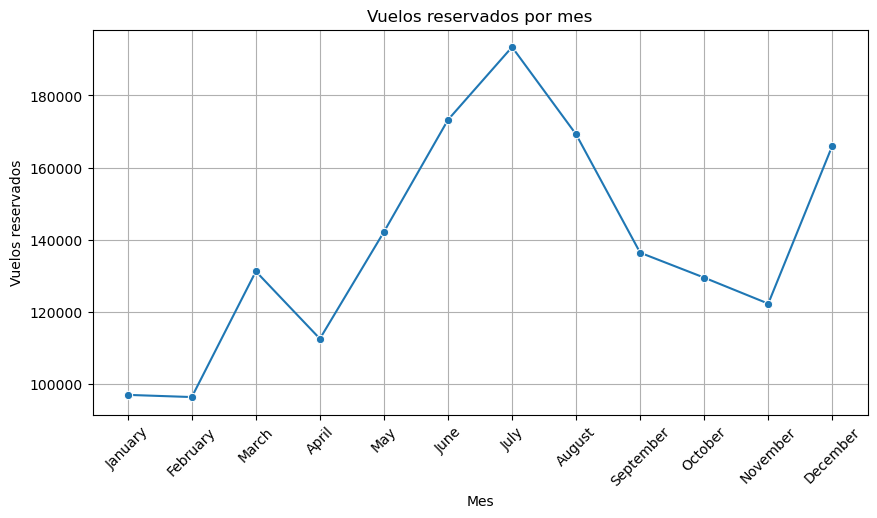

In [138]:
# 1.Distribución de vuelos reservados por mes durante el año
# -----------------------------------------------------------------------

# Orden de los meses para que aparezcan bien en el gráfico
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
# Agrupar por mes y sumar los vuelos reservados
vuelos_mes = df.groupby('Month')['Flights Booked'].sum().reset_index()

# Gráfico de línea
plt.figure(figsize=(10, 5))
sns.lineplot(data=vuelos_mes, x= meses_ordenados, y='Flights Booked', marker='o')
plt.title('Vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Conclusiones:

- La distribución de vuelos reservados por mes muestra una clara estacionalidad. 
- El número de reservas comienza a aumentar a partir de marzo, alcanzando su punto máximo en julio. 
- Luego disminuye progresivamente hasta noviembre, con un ligero repunte en diciembre. 
- Esto sugiere que los clientes reservan más vuelos en los meses de verano, posiblemente por vacaciones, y menos en otoño.


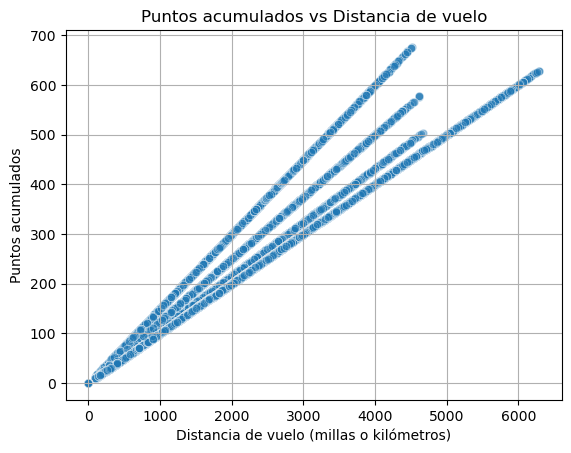

In [139]:
# 2.Relación entre puntos acumulados por distancia de vuelo

sns.scatterplot(data=df, x='Distance', y='Points Accumulated', alpha=0.5)
plt.title('Puntos acumulados vs Distancia de vuelo')
plt.xlabel('Distancia de vuelo (millas o kilómetros)')
plt.ylabel('Puntos acumulados')
plt.grid(True)
plt.show()


#### Conclusiones:
- La gráfica muestra una clara relación lineal positiva entre la distancia de vuelo y los puntos acumulados, lo que indica que, en general, cuanto más larga es la distancia recorrida, más puntos se obtienen. 
- Sin embargo, no todos los puntos siguen una única línea: se observan varias agrupaciones con pendientes distintas. 
- Esto sugiere que puede haber diferentes reglas de acumulación de puntos, posiblemente relacionadas con el tipo de billete, la clase de servicio o el nivel del programa de fidelización del cliente. 
- Por lo tanto, aunque la tendencia general es clara, el sistema de puntos parece variar según otros factores..



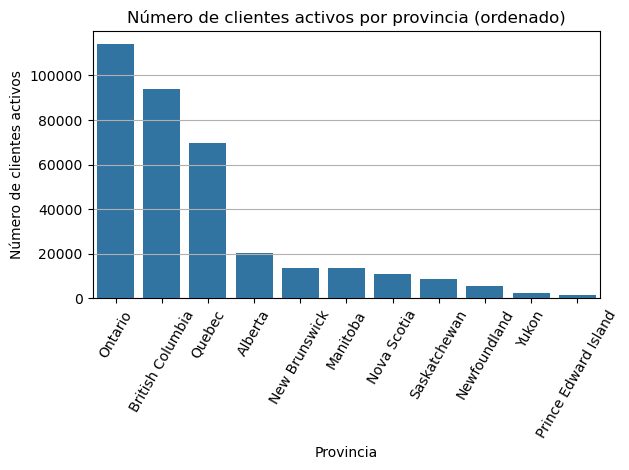

In [140]:
# 3.Análisis de clientes activos por provincia
# Filtro el DataFrame para excluir a los clientes que han cancelado
df_activos = df[df['Canceled'] == False]

# Agrupo por provincia y cuento los clientes activos
clientes_por_provincia = df_activos['Province'].value_counts().reset_index()
clientes_por_provincia.columns = ['Province', 'Loyalty Number']

# Ordeno de mayor a menor
clientes_por_provincia = clientes_por_provincia.sort_values(by='Loyalty Number', ascending=False)

# Creo el gráfico
sns.barplot(data=clientes_por_provincia, x='Province', y='Loyalty Number')
plt.title('Número de clientes activos por provincia (ordenado)')
plt.xlabel('Provincia')
plt.ylabel('Número de clientes activos')
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Conclusiones:

- Ontario es, con diferencia, la provincia con más clientes activos, seguida por British Columbia y Quebec.
- Existe una gran diferencia en el número de clientes entre las primeras tres provincias y el resto.
- Provincias menos pobladas como Yukon y Prince Edward Island tienen una cantidad mínima de clientes activos.
- Esto sugiere una posible relación entre la población general de la provincia y el número de clientes.
- La presencia del servicio o la campaña de captación de clientes parece estar más consolidada en las provincias grandes.



C:\Users\usuari\AppData\Local\Temp\ipykernel_6916\1527328199.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_salario_por_educacion, x='Salary', y='Education', ci=None, color='#2f7a9f')


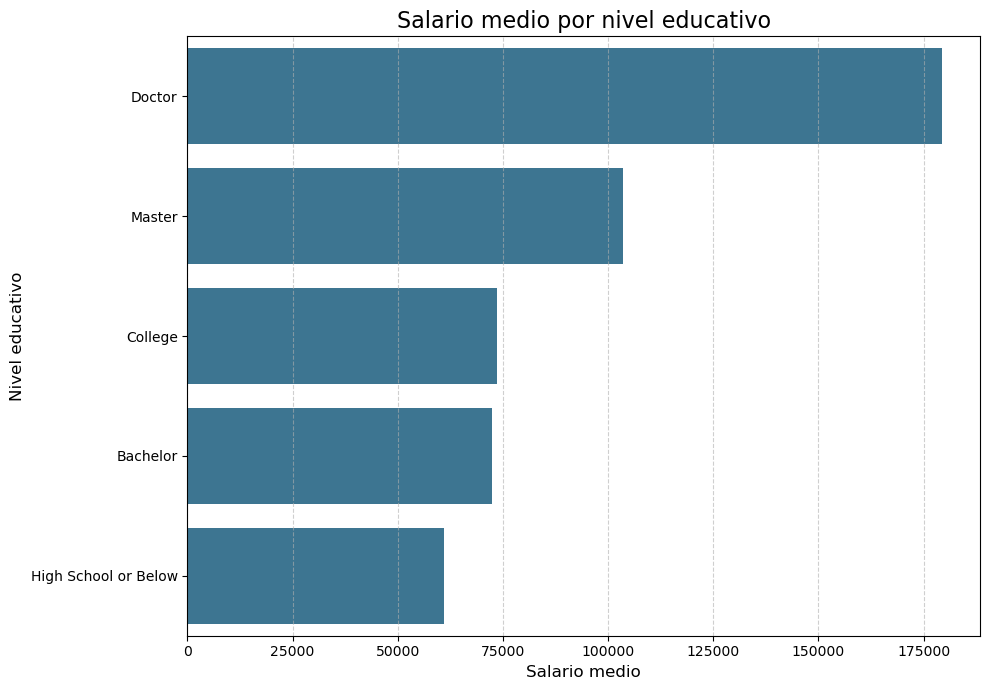

In [141]:
# 4.Salario promedio por nivel educativo
# -----------------------------------------------------------------------

df_activos = df[df['Canceled'] == False]
df_salario_por_educacion = df_activos.groupby('Education')['Salary'].mean().reset_index()
df_salario_por_educacion = df_salario_por_educacion.sort_values(by='Salary', ascending=False)

plt.figure(figsize=(10, 7)) 

sns.barplot(data=df_salario_por_educacion, x='Salary', y='Education', ci=None, color='#2f7a9f')

plt.title('Salario medio por nivel educativo', fontsize=16)
plt.xlabel('Salario medio', fontsize=12)
plt.ylabel('Nivel educativo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.tight_layout() 
plt.show()

#### Conclusiones:

- Existe una relación positiva entre el nivel educativo alcanzado y el salario medio.
- Las personas con un doctorado obtienen, en promedio, el salario más alto con una diferencia clara respecto al resto.
- Quienes tienen un máster también ganan significativamente más que los niveles inferiores.
- Los niveles educativos intermedios como College y Bachelor presentan salarios muy similares.
- Las personas con solo educación secundaria o inferior tienen el salario medio más bajo.
- En general, invertir en educación superior parece estar asociado con mejores ingresos.


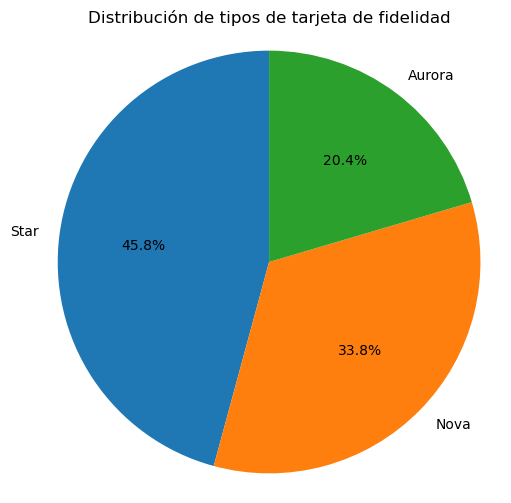

In [142]:
# 5.Proporción de los distintos tipos de tarjeta de fidelidad de los clientes
# -----------------------------------------------------------------------

df_activos = df[df['Canceled'] == False]

# Contar los tipos de tarjeta entre los clientes activos
conteo_tarjetas = df_activos['Loyalty Card'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(conteo_tarjetas, labels=conteo_tarjetas.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de tipos de tarjeta de fidelidad')
plt.axis('equal')  # Hace que el pastel sea redondo
plt.show()


#### Conclusiones:
- La tarjeta de fidelidad más común es la Star, con casi la mitad de los clientes (45.5%).
- Le sigue la tarjeta Nova, que representa aproximadamente un tercio de los clientes (33.9%).
- La tarjeta Aurora es la menos utilizada, con poco más del 20% de participación.
- Esto sugiere que la mayoría de los clientes se concentran en dos tipos de tarjeta (Star y Nova).
- Sería interesante investigar si las ventajas o beneficios ofrecidos por Star y Nova son más atractivos, o si hay campañas que influyen en su mayor uso.


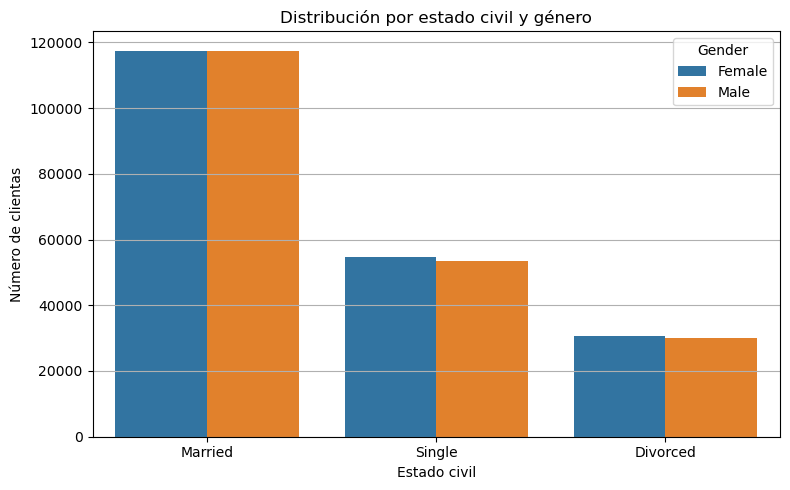

In [143]:
# 6.Distribución por género y estado civil
# -----------------------------------------------------------------------
# Gráfico 
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Marital Status', hue='Gender')

# Títulos y etiquetas
plt.title('Distribución por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Número de clientas')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Conclusiones:
- La mayoría de los clientes están casados, tanto hombres como mujeres, con cifras prácticamente iguales.
- El segundo grupo más numeroso es el de personas solteras, también con cantidades muy similares entre géneros.
- Las personas divorciadas representan el grupo más pequeño, sin grandes diferencias entre hombres y mujeres.
- En general, la variable género no parece marcar diferencias significativas en la distribución del estado civil.
- Esto sugiere que, al menos en este conjunto de datos, el estado civil está equilibrado por género.
